# HOME WORK CODE SOLUTIONS

## Import Libraries

In [72]:
## imports used in question 1
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge  #linear regression model
from sklearn.feature_selection import RFE

## imports used in question 2
import numpy as np
import pandas as pd 
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

## imports used in question 3
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #for scoring model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')


# Problem 1

In [78]:
def problem1(filename):  
    #read file as dataframe
    data = pd.read_csv(filename)
    
    ## seperate dataset into X-input and Y-target 
    #input feature matrix 30 X 8
    X = data.iloc[:,2:]

    #output target vector 30 x 1
    Y = data.iloc[:, 1]
    Y = pd.DataFrame(Y) 
    #convert string object column to float
    Y["Calories Burned"] = Y["Calories Burned"].apply(lambda x:x.replace(',' , '')).astype(float)

    #convert string object columns to float
    X["Steps"] = X["Steps"].apply(lambda x : x.replace(',' , '')).astype(float)
    X["Activity Calories"] = X["Activity Calories"].apply(lambda x : x.replace(',' , '')).astype(float)



    #*************** Mutual Information Score between Features and Calories Burned*******************

    # mutual score of each feature
    mutual_scores = mutual_info_regression(X, Y)

    #get indices of the first four highest mutual information score features
    indices = np.argsort(mutual_scores)[::-1][:4]

    # Output the feature names based on the indices
    print("Selected Features having top mutual information scores")

    print(list(X.columns[indices]))


    #***************** Recursive Feature Elimination with Ridge Regression ************** 

    #initialize ridge model object
    estimator = Ridge()

    #selector object initialization
    selector = RFE(estimator, n_features_to_select= 4, step=1)

    #fit the model and compute RFE
    selector = selector.fit(X, Y)

    # Output the feature names based on RFE
    print(" \n Selected features by Recursive Feature Elimination")
    print(list(X.columns[selector.support_]))


## Run Problem 1

In [79]:
problem1("fitbit.csv")

Selected Features having top mutual information scores
['Activity Calories', 'Minutes Fairly Active', 'Steps', 'Distance']
 
 Selected features by Recursive Feature Elimination
['Distance', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']


# Problem 2

In [12]:

def problem2(filename):

    #read the file as dataframe
    dataset = pd.read_csv(filename)
    
    dataset.head()
    #drop ID column
    data = dataset.drop(['ID'], axis = 1)
    
    #range of k cluster sizes 
    cluster_numbers = range(2 , 10)

    #initialize standard scaler
    scaler = StandardScaler()

    #normalize dataset features
    X = scaler.fit_transform(data)

    #list of distortions or inertia
    inertia_list = []

    #list for silhouette score
    silhouette_score_list = []

    #loop through all cluster numbers
    for k in cluster_numbers:

        #group dataset into k-clusters
        kmeans = KMeans(n_clusters = k)

        kmeans.fit(X)

        inertia_list.append(kmeans.inertia_)

        silhouette_score_list.append(silhouette_score(X , kmeans.labels_ , "euclidean"))

    #plot graph Inertia against Cluster size for Elbow method
    plt.plot(cluster_numbers, inertia_list , color = 'green', marker = 'o')
    plt.xlabel('Cluster Number')
    plt.ylabel('Inertia or Distortion')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()


    #Plot graph for Silhouette Score against cluster size

    plt.plot(cluster_numbers, silhouette_score_list, color= 'blue' , marker = 'o')
    plt.xlabel('Cluster Number')
    plt.ylabel('silhouette_score')
    plt.title('Silhouette Method')
    plt.grid(True)

    plt.show()

    

## Run problem 2

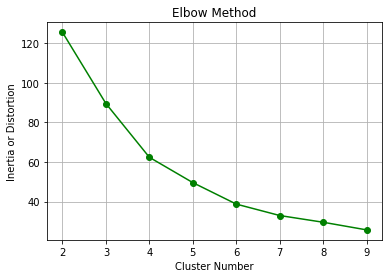

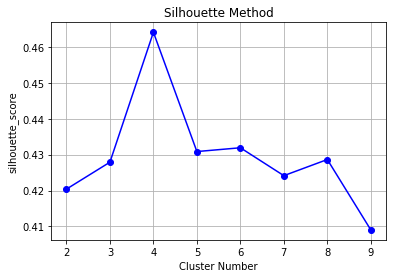

In [13]:
filename = "customer.csv"

problem2(filename)

# Problem 3

## Problem 3 Helper Functions

In [113]:
## ******Clean Dataset Function************
def data_cleaning(data):
    
    '''
    data : pandas Dataframe of training examples
    returns: cleaned_version of the dataset with categorical features replaced by numeric values
    '''
    
    dataset = data
    
    # list of column names of all categorical features
    cat_columns = dataset.select_dtypes(include = ['object']).columns 

    #convert to numeric data
    dataset[cat_columns] = dataset[cat_columns].astype('category').apply(lambda x:x.cat.codes)

    return dataset


In [114]:

def problem3(filename):

    #read the dataset as dataframe
    df = pd.read_csv(filename)
    
    df = df[df["TotalCharges"] != " "]

    ## seperate dataset into input features and output labels
    #output labels
    Y = pd.DataFrame(dt.iloc[:, -1])

    #input feature matrix
    X = pd.DataFrame(dt.iloc[:,: -1])

    #covert numeric to categorical data
    X = data_cleaning(X)

    scaler = StandardScaler()
    
      
    #normalize features for KNN model
    X_norm = scaler.fit_transform(X)
    
    #split dataset
    #X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.3)


    #initialize 5 fold cross validation with randomly split data
    kf = KFold(n_splits = 5 , shuffle = True)



    # ***************** Logistic Regression************************************************

    LR = LogisticRegression(max_iter = 1000)

    #Train and validate model
    LR_score = cross_validate(LR , X_norm, Y.values.ravel(), scoring = 'accuracy', cv = kf, return_train_score = True)

    LR_score = pd.DataFrame(LR_score)

    train_score = np.sum(LR_score['train_score']) / len(LR_score['train_score'])
    test_score = np.sum(LR_score['test_score']) / len(LR_score['test_score'])
    
    #print train and test score of logistic regression model
    print(f"model\t\t\ttrain\t\t\ttest")
    print(f"LogisticRegression\t{train_score}\t{test_score}")




    # ***************** Decision Tree Classifier************************************************
    #initialize model
    DT_model = DecisionTreeClassifier()

    #Train and validate model
    DT_score = cross_validate(DT_model , X, Y.values.ravel(), scoring = 'accuracy', cv = kf, return_train_score = True)

    #convert to Dataframe
    DT_score = pd.DataFrame(DT_score)
    train_score = np.sum(DT_score['train_score']) / len(DT_score['train_score'])
    test_score = np.sum(DT_score['test_score']) / len(DT_score['test_score'])

    #print train and test score of Decision Tree model

    print(f"DecisionTree\t\t{train_score}\t\t\t{test_score}")
    
    
     # ***************** Linear Support Vector Machine Model ************************************************

    #initialize model
    SVC_model = LinearSVC()

    #Train and validate model
    SVC_score = cross_validate(SVC_model , X, Y.values.ravel(), scoring = 'accuracy', cv = kf, return_train_score = True)

    #convert to Dataframe
    SVC_score = pd.DataFrame(SVC_score)
    train_score = np.sum(SVC_score['train_score']) / len(SVC_score['train_score'])
    test_score = np.sum(SVC_score['test_score']) / len(SVC_score['test_score'])

    #print train and test score of Support Vector Machine model

    print(f"LinearSVC\t\t{train_score}\t{test_score}")
    
    
    
    # ***************** K-Nearest Neighbor************************************************


    #initialize model
    KN_model = KNeighborsClassifier()
  
    #Train and validate model
    KN_score = cross_validate(KN_model , X_norm, Y.values.ravel(), scoring = 'accuracy', cv = kf, return_train_score = True)

    #convert to Dataframe
    KN_score = pd.DataFrame(KN_score)
    train_score = np.sum(KN_score['train_score']) / len(KN_score['train_score'])
    test_score = np.sum(KN_score['test_score']) / len(KN_score['test_score'])

    #print train and test score of K Nearest Neighbor model

    print(f"KNN\t\t\t{train_score}\t{test_score}")


    # ***************** Neural Network Model ************************************************

    #initialize model
    NN_model = MLPClassifier()

    #Train and validate model
    NN_score = cross_validate(NN_model , X, Y.values.ravel(), scoring = 'accuracy', cv = kf, return_train_score = True)

    #convert to Dataframe
    NN_score = pd.DataFrame(NN_score)
    train_score = np.sum(NN_score['train_score']) / len(NN_score['train_score'])
    test_score = np.sum(NN_score['test_score']) / len(NN_score['test_score'])

    #print train and test score of Neural Network model

    print(f"MLPClassifier\t\t{train_score}\t{test_score}")

   


## Run Problem 3

In [112]:
problem3('telco_customer_churn.csv')


model			train			test
LogisticRegression	0.8052677195339866	0.802073319246403
DecisionTree		1.0			0.7268206819794826
LinearSVC		0.6610416412710383	0.6584042720498096
KNN			0.8330966728498131	0.751953452642106
MLPClassifier		0.6793287616477345	0.6701632968256017
